In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
dicionario = pd.read_csv('https://raw.githubusercontent.com/beromes/projeto-icd/main/datasets/dicionario_nascidos_vivos.csv')
df = pd.read_csv('https://raw.githubusercontent.com/beromes/projeto-icd/main/datasets/microdados.csv')

<ipython-input-2-df4391d78556>:2: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('https://raw.githubusercontent.com/beromes/projeto-icd/main/datasets/microdados.csv')


In [ ]:
df['data_nascimento'] = pd.to_datetime(df['data_nascimento'], format='%Y-%m-%d')
df['data_nascimento'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: data_nascimento
Non-Null Count   Dtype         
--------------   -----         
100000 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 781.4 KB


In [ ]:
# Cria um dataframe com todas as datas do invervalo

import datetime

data_inicio = datetime.date(2015, 1, 1)
data_fim = datetime.date(2020, 12, 31)

intervalo_tempo = pd.date_range(start=data_inicio, end=data_fim)
datas = pd.DataFrame({'data': intervalo_tempo})

datas.head()

NameError: ignored

In [ ]:
nascimentos = df.groupby('data_nascimento')['data_nascimento'].count()
nascimentos.head()

data_nascimento
2015-01-01    30
2015-01-02    48
2015-01-03    48
2015-01-04    42
2015-01-05    51
Name: data_nascimento, dtype: int64

In [ ]:
# Adiciona o numero de nascimentos ao dataframe com todas as datas
datas['nascimentos'] = datas.apply(lambda x: nascimentos[x['data']], axis=1)
df = datas.copy()
df.head()

,data,nascimentos
0,2015-01-01,30
1,2015-01-02,48
2,2015-01-03,48
3,2015-01-04,42
4,2015-01-05,51


In [ ]:
df[df['nascimentos']==0]

,data,nascimentos


In [ ]:
pre_pandemia = df[(df['data'] < '2020-03-11') & (df['data'] > '2019-06-01')]
pandemia = df[df['data'] >= '2020-03-11']

print(len(pre_pandemia))
print(len(pandemia))

283
296


In [ ]:
# Bootsrap
def bootstrap(df, col, size, n_sub=10000):
  values = np.zeros(n_sub)
  for i in range(n_sub):
    random_state=i
    sample = df.sample(size, replace=True, random_state=i)

    values[i] = sample[col].mean()

  LI = np.percentile(values, 2.5)
  LS = np.percentile(values, 97.5)
  return values, LI, LS


In [ ]:
v_pre_pandemia, LI, LS = bootstrap(pre_pandemia, 'nascimentos', len(pandemia))
v_pandemia, _, _ = bootstrap(pandemia, 'nascimentos', len(pandemia))

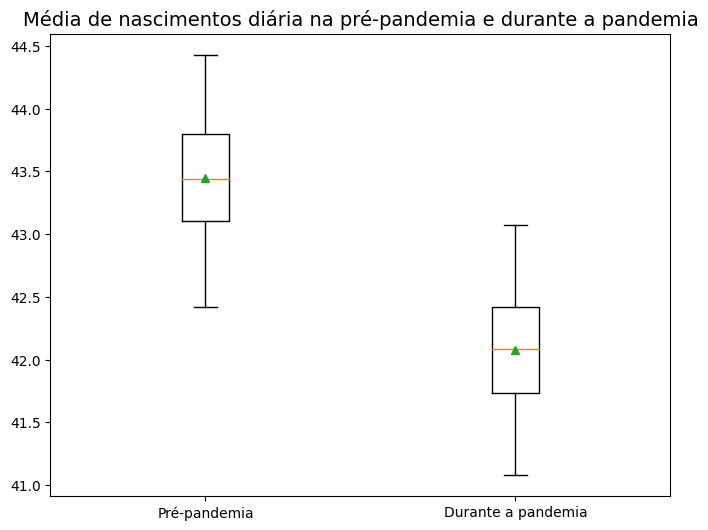

In [ ]:
bp_data = [v_pre_pandemia, v_pandemia]

plt.rcParams['figure.figsize']  = (8, 6)
plt.boxplot(bp_data, whis=[2.5, 97.5], positions=[1,2], showfliers=False, showmeans=True)
plt.xticks([1,2], ['Pré-pandemia', 'Durante a pandemia'], fontsize=10)
plt.ylabel('', fontsize=13)
plt.xlabel('', fontsize=12)
plt.title('Média de nascimentos diária na pré-pandemia e durante a pandemia', fontsize=14)
plt.show()

In [ ]:
def despine(ax=None):
    if ax is None:
        ax = plt.gca()

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

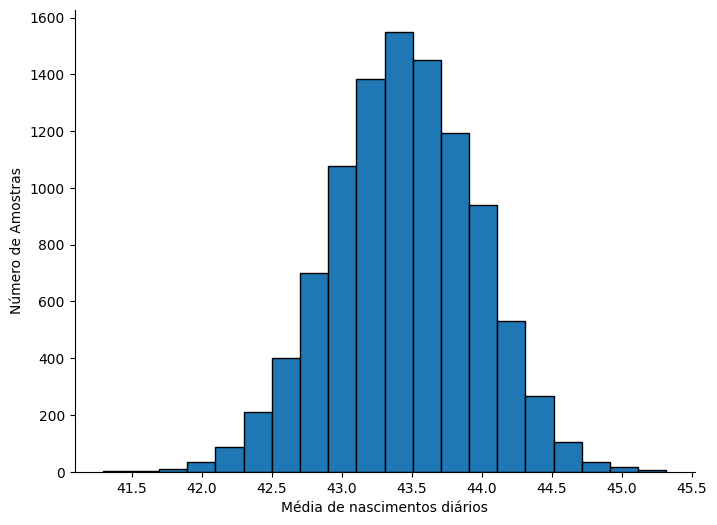

In [ ]:
plt.hist(v_pre_pandemia, bins=20, edgecolor='k')
plt.ylabel('Número de Amostras')
plt.xlabel('Média de nascimentos diários')
despine()

In [ ]:
pandemia['nascimentos'].mean()

42.0777027027027

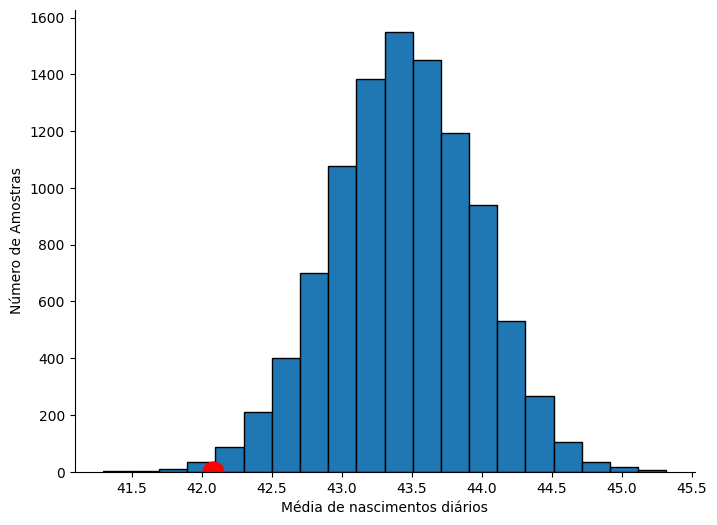

In [ ]:
plt.hist(v_pre_pandemia, bins=20, edgecolor='k')
plt.ylabel('Número de Amostras')
plt.xlabel('Média de nascimentos diários')
plt.plot([42.08], [0], 'ro', ms=15)
despine()